In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
killers=pd.read_excel('/users/veronicaventure/Documents/killers_music.xlsx')
killers.head()

,title,artist,genre,year,bpm,energy,dance,live,mood,time,acous,speech,pop
0,Mr. Brightside,The Killers,modern rock,2004,148,92,36,10,23,223,0,8,77
1,When You Were Young,The Killers,modern rock,2006,130,99,47,28,32,220,0,11,75
2,Human,The Killers,modern rock,2008,135,80,56,9,58,245,0,6,74
3,Somebody Told Me,The Killers,modern rock,2004,138,99,51,12,65,197,0,9,69
4,Read My Mind,The Killers,modern rock,2006,132,92,54,10,33,247,1,4,69


In [3]:
killers.describe()

,year,bpm,energy,dance,live,mood,time,acous,speech,pop
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,2009.378049,128.036585,80.268293,48.890244,17.707317,39.573171,247.378049,8.756098,6.085366,48.439024
std,4.448998,24.619296,18.363308,11.551288,11.727869,19.321216,58.296950,19.467961,3.784964,9.359880
min,2004.000000,74.000000,21.000000,24.000000,5.000000,4.000000,50.000000,0.000000,2.000000,38.000000
25%,2006.000000,107.000000,75.500000,40.250000,10.000000,23.000000,223.000000,0.000000,4.000000,42.000000
50%,2008.000000,131.000000,86.500000,50.000000,12.500000,39.000000,247.000000,1.000000,5.000000,45.500000
75%,2012.000000,141.750000,92.000000,57.750000,23.750000,51.000000,271.500000,4.750000,8.000000,52.750000
max,2020.000000,180.000000,99.000000,69.000000,73.000000,98.000000,528.000000,98.000000,25.000000,77.000000


Text(0, 0.5, 'Number of Songs')

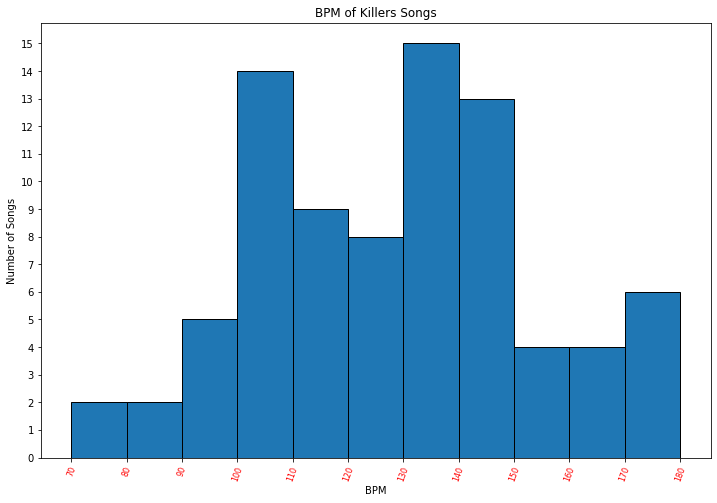

In [14]:
bins=(70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180)
fig, ax = plt.subplots(1,1, figsize=(12,8))
plt.hist(killers['bpm'], bins=bins, edgecolor='black')
ax.set_xticks(bins)
ax.set_xticklabels(bins, rotation=70, ha='center', fontsize=8, color='red')
y_ticks= np.arange(0, 16, 1)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks)
plt.title('BPM of Killers Songs')
plt.xlabel('BPM')
plt.ylabel('Number of Songs')

In [15]:
killers['year'].value_counts()

2007    17
2012    15
2017    14
2008    12
2006    12
2004    11
2020     1
Name: year, dtype: int64

In [16]:
killers.drop(killers[killers['year']==2020].index, inplace=True)

In [17]:
killers['year'].value_counts()

2007    17
2012    15
2017    14
2008    12
2006    12
2004    11
Name: year, dtype: int64

<Figure size 720x864 with 0 Axes>

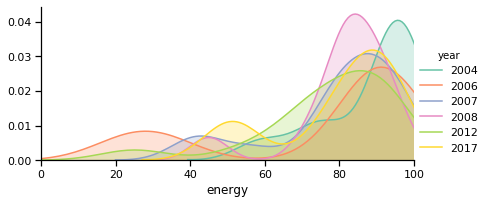

In [40]:
plt.figure(figsize=(10, 12))
ax = sns.FacetGrid(killers, hue="year",aspect=2, palette='Set2')
#plot all possible kde for age 
ax.map(sns.kdeplot,'energy',shade= True)
#set lower and upper age limits
ax.set(xlim=(0,100))
#add a legend
ax.add_legend()

Text(0, 0.5, 'Energy')

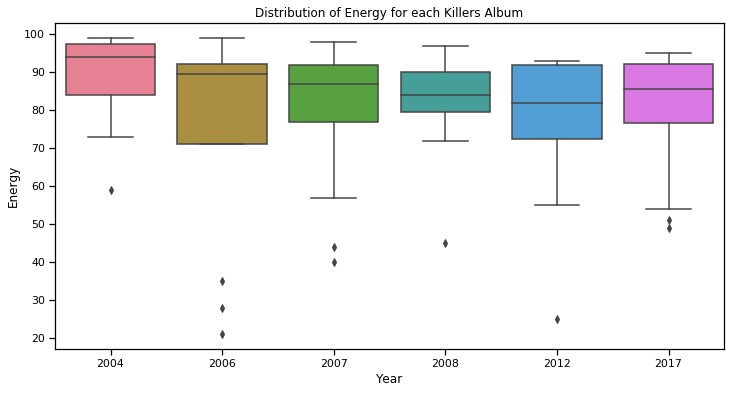

In [37]:
sns.set_context('notebook')
plt.figure(figsize=(12,6))
ax=sns.boxplot(x='year', y='energy', data=killers, orient='v',palette='husl')
ax.set_title('Distribution of Energy for each Killers Album')

ax.set_xlabel('Year')
ax.set_ylabel('Energy')


<Figure size 720x864 with 0 Axes>

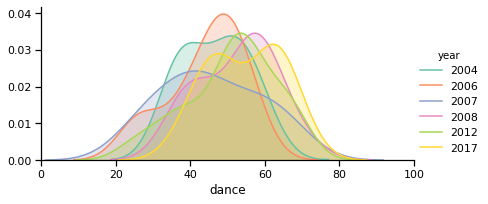

In [41]:
plt.figure(figsize=(10, 12))
ax1 = sns.FacetGrid(killers, hue="year",aspect=2, palette='Set2')
#plot all possible kde for age 
ax1.map(sns.kdeplot,'dance',shade= True)
#set lower and upper age limits
ax1.set(xlim=(0,100))
#add a legend
ax1.add_legend()

Text(0, 0.5, 'Danceability')

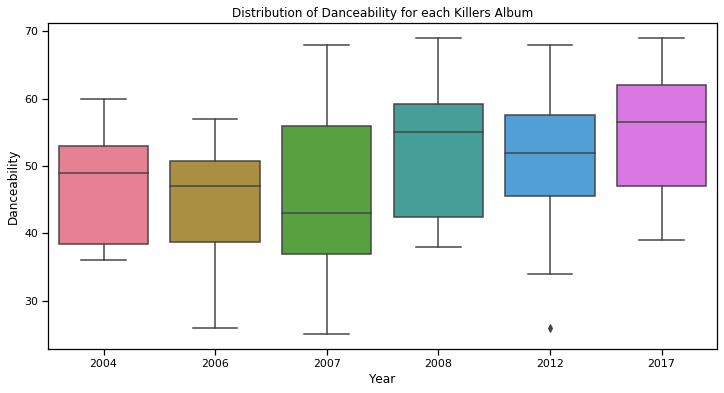

In [42]:
sns.set_context('notebook')
plt.figure(figsize=(12,6))
ax=sns.boxplot(x='year', y='dance', data=killers, orient='v',palette='husl')
ax.set_title('Distribution of Danceability for each Killers Album')

ax.set_xlabel('Year')
ax.set_ylabel('Danceability')


In [46]:
convert_dict={'year':str}
killers=killers.astype(convert_dict)


In [49]:
fig1 = px.scatter(killers, x="year", y="dance", log_x=False, hover_name='title',
                  color= 'year', width=600, height=600)
fig1.update_layout(
    title="Song Danceability",
    xaxis_title="Year",
    yaxis_title="Danceability")
fig1.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 2004,
        dtick = 1))
fig1.show()